# 第2章 k-近邻算法



## 2.1 k-近邻算法概述

k-近邻算法采用测量不同特征值之间的距离方法进行分类。

定义：又称作kNN算法,指对有标签的，知道每条数据与所属分类对应关系的样本。对陌生的数据，我们会根据算法选取样本数据中前$k$个最相邻（欧几里得*距离*）数据的标签。

In [1]:
#k-近邻算法
def classify0(targe_vector, k, x, y):
    """
    k-近邻算法，目前只支持输入一个元素
    :param targe_vector:目标元素
    :param k: 取前k个近似的数据
    :param x: 训练集
    :param y: 训练标签
    :return: 前k个的标签 {"good":5, "fine":3}
    """
    assert len(targe_vector) == x.shape[1]
    # 平方差求和，再取根号
    distances = ((x - targe_vector) ** 2).sum(axis=1) ** 0.5
    sorted_distances = distances.argsort()# 返回的是距离从小到大的索引值
    dict_result = Counter()
    for i in range(k):
        dict_result[y[sorted_distances[i]][0]] = dict_result[y[sorted_distances[i]][0]] + 1
    return dict_result

## 2.2[数据预处理](https://blog.csdn.net/weixin_36604953/article/details/102652160)

对于一条数据，的不同属性，因为类型不同，所以取值范围不一样，这导致在计算数据之前的距离时，较大的数让小的数据权重缩小，所以需要特征缩放：

### 2.2.1 Rescaling (min-max normalization)

归一化，数据会落到`[0, 1]`之间
$$
x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}}
$$

In [2]:
def rescaling(arr_random):
    min_value = arr_random.min(0)
    max_value = arr_random.max(0)
    result_rescaling = (arr_random - min_value) / (max_value - min_value)
    return result_rescaling

### 2.2.2 Mean normalization

标准化，数据会落到`[-1, 1]`之间
$$
x_{new}=\frac{x-x_{mean}}{x_{max}-x_{min}}
$$

In [3]:
def normalization(target_arr):
    """
    数据标准化
    :param target_arr:
    :return:
    """
    mean_value = arr_random.mean(0)
    min_value = arr_random.min(0)
    max_value = arr_random.max(0)
    result_normalization = (arr_random - mean_value) / (max_value - min_value)
    return result_normalization

### 2.2.3 Standardization

标准差标准化，数据会落到实数集
$$
x_{new}=\frac{x-µ}{𝜎}
$$

### 2.2.4 总结

如果你对处理后的数据范围有严格要求，那肯定是归一化，个人经验，标准化是ML中更通用的手段，如果你无从下手，可以直接使用标准化；如果数据不为稳定，存在极端的最大最小值，不要用归一化。在分类、聚类算法中，需要使用距离来度量相似性的时候、或者使用PCA技术进行降维的时候，标准化表现更好；在不涉及距离度量、协方差计算的时候，可以使用归一化方法。

## 2.3 代码实现 

In [10]:
from collections import Counter

import numpy as np
import operator
import pandas as pd
from matplotlib import pyplot as plt


def load_data(url):
    base_data = pd.read_csv(url, delim_whitespace=True, header=None)
    arr_x = base_data.loc[:, 0:2].values
    arr_y = base_data.loc[:, 3].values
    arr_y = arr_y.reshape((arr_y.shape[0], 1))
    return arr_x, arr_y


def datingClassTest():
    train_rate = 0.9
    data_url = "data/Ch02/datingTestSet.txt"
    arr_x, arr_y = load_data(data_url)
    arr_x = rescaling(arr_x)
    # 用于训练数据的数量
    train_count = int(arr_x.shape[0] * train_rate)
    test_x = arr_x[train_count:, :]
    test_y = arr_y[train_count:, :]
    dict_result = {"true": 0, "false": 0}
    for target_x, target_y in zip(test_x, test_y):
        pre_y = classify0(target_x, 1, arr_x[:train_count, :], arr_y[:train_count, :])
        if list(pre_y.keys())[0] == target_y:
            dict_result['true'] = dict_result['true'] + 1
        else:
            dict_result['false'] = dict_result['false'] + 1
    return dict_result


def show_data():
    data_url = "data/Ch02/datingTestSet.txt"
    arr_x, arr_y = load_data(data_url)
    target = [13438, 9.665618, 0.261333]
    result = classify0(target, 4, arr_x, arr_y)
    dict_result = dict()
    for i in arr_y.tolist():
        if i[0] not in dict_result:
            dict_result.update({i[0]: len(dict_result)})

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(arr_x[:, 1], arr_x[:, 2], 15.0, [dict_result[i] for i in arr_y[:, 0]])
    plt.show()



{'true': 94, 'false': 6}


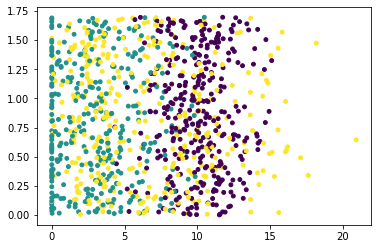

In [12]:
# 返回分类器的精度
dict_result = datingClassTest()
print(dict_result)
show_data()